In [1]:
# Import the dependencies.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs 

In [3]:
# Add the latitudes and longitudes to a list.
coordinates = list(lat_lngs)

In [4]:
# Use the citipy module to determine city based on latitude and longitude.
from citipy import citipy

In [5]:
# Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name
    
    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)

631

In [6]:
# Import the requests library.
import requests

# Import the API key.
from config import weather_api_key

In [7]:
# Starting URL for Weather Map API Call.
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key
print(url)

http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=6b92f45b49ee20d49d94ae33601d90d6


In [8]:
# Import the datetime module from the datetime library.
from datetime import datetime

In [9]:
# Create an empty list to hold the weather data.
city_data = []
# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1

# Loop through all the cities in the list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1

# Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")


Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | busselton
Processing Record 2 of Set 1 | vanavara
Processing Record 3 of Set 1 | barrow
Processing Record 4 of Set 1 | hermanus
Processing Record 5 of Set 1 | vaini
Processing Record 6 of Set 1 | alta floresta
Processing Record 7 of Set 1 | severo-kurilsk
Processing Record 8 of Set 1 | port macquarie
Processing Record 9 of Set 1 | kaitangata
Processing Record 10 of Set 1 | grand river south east
City not found. Skipping...
Processing Record 11 of Set 1 | punta arenas
Processing Record 12 of Set 1 | iqaluit
Processing Record 13 of Set 1 | illoqqortoormiut
City not found. Skipping...
Processing Record 14 of Set 1 | kruisfontein
Processing Record 15 of Set 1 | torbay
Processing Record 16 of Set 1 | alofi
Processing Record 17 of Set 1 | klyuchi
Processing Record 18 of Set 1 | poya
Processing Record 19 of Set 1 | cidreira
Processing Record 20 of Set 1 | nur
Processing Record 21 of Set 1 | upernavik
Pr

Processing Record 40 of Set 4 | sylacauga
Processing Record 41 of Set 4 | beringovskiy
Processing Record 42 of Set 4 | zhezkazgan
Processing Record 43 of Set 4 | scarborough
Processing Record 44 of Set 4 | gorontalo
Processing Record 45 of Set 4 | chuy
Processing Record 46 of Set 4 | severnyy
Processing Record 47 of Set 4 | tabiauea
City not found. Skipping...
Processing Record 48 of Set 4 | kirensk
Processing Record 49 of Set 4 | jatibonico
Processing Record 50 of Set 4 | leh
Processing Record 1 of Set 5 | nakambala
Processing Record 2 of Set 5 | gorno-chuyskiy
City not found. Skipping...
Processing Record 3 of Set 5 | camocim
Processing Record 4 of Set 5 | talnakh
Processing Record 5 of Set 5 | dikson
Processing Record 6 of Set 5 | lalibela
Processing Record 7 of Set 5 | eha amufu
Processing Record 8 of Set 5 | sorland
Processing Record 9 of Set 5 | vestmanna
Processing Record 10 of Set 5 | tuktoyaktuk
Processing Record 11 of Set 5 | pangai
Processing Record 12 of Set 5 | beloha
Proc

Processing Record 31 of Set 8 | hurghada
Processing Record 32 of Set 8 | andenes
Processing Record 33 of Set 8 | sobolevo
Processing Record 34 of Set 8 | corralillo
Processing Record 35 of Set 8 | ugep
Processing Record 36 of Set 8 | montrose
Processing Record 37 of Set 8 | magadan
Processing Record 38 of Set 8 | nacala
Processing Record 39 of Set 8 | raigarh
Processing Record 40 of Set 8 | harboore
Processing Record 41 of Set 8 | broken hill
Processing Record 42 of Set 8 | rognan
Processing Record 43 of Set 8 | salalah
Processing Record 44 of Set 8 | saleaula
City not found. Skipping...
Processing Record 45 of Set 8 | kokopo
Processing Record 46 of Set 8 | jalu
Processing Record 47 of Set 8 | ngunguru
Processing Record 48 of Set 8 | talas
Processing Record 49 of Set 8 | touros
Processing Record 50 of Set 8 | tazovskiy
Processing Record 1 of Set 9 | kontagora
Processing Record 2 of Set 9 | galesong
Processing Record 3 of Set 9 | makat
Processing Record 4 of Set 9 | vaitupu
City not fou

Processing Record 15 of Set 12 | tura
Processing Record 16 of Set 12 | sokoni
Processing Record 17 of Set 12 | sao jose da coroa grande
Processing Record 18 of Set 12 | ribas do rio pardo
Processing Record 19 of Set 12 | kamenka
Processing Record 20 of Set 12 | wulanhaote
City not found. Skipping...
Processing Record 21 of Set 12 | atbasar
Processing Record 22 of Set 12 | pimentel
Processing Record 23 of Set 12 | tokur
Processing Record 24 of Set 12 | buariki
City not found. Skipping...
Processing Record 25 of Set 12 | kayerkan
Processing Record 26 of Set 12 | binzhou
Processing Record 27 of Set 12 | mbuji-mayi
Processing Record 28 of Set 12 | tandur
Processing Record 29 of Set 12 | ashland
Processing Record 30 of Set 12 | yashkul
Processing Record 31 of Set 12 | dum duma
Processing Record 32 of Set 12 | yershov
Processing Record 33 of Set 12 | provideniya
Processing Record 34 of Set 12 | birao
Processing Record 35 of Set 12 | novyy urgal
Processing Record 36 of Set 12 | morrisburg
Pro

In [10]:
len(city_data)

583

In [11]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_df = pd.DataFrame(city_data)
city_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Busselton,-33.65,115.33,44.01,98,46,8.81,AU,2020-07-07 22:13:47
1,Vanavara,60.34,102.28,54.84,90,32,3.62,RU,2020-07-07 22:13:47
2,Barrow,71.29,-156.79,41.00,80,1,14.99,US,2020-07-07 22:13:48
3,Hermanus,-34.42,19.23,45.00,90,0,1.01,ZA,2020-07-07 22:13:48
4,Vaini,-21.20,-175.20,73.40,94,90,8.05,TO,2020-07-07 22:13:48
5,Alta Floresta,-9.88,-56.09,78.96,46,0,4.07,BR,2020-07-07 22:13:48
6,Severo-Kurilsk,50.68,156.12,52.83,85,26,14.83,RU,2020-07-07 22:13:48
7,Port Macquarie,-31.43,152.92,53.01,97,94,7.70,AU,2020-07-07 22:13:49
8,Kaitangata,-46.28,169.85,41.00,81,86,11.01,NZ,2020-07-07 22:13:50
9,Punta Arenas,-53.15,-70.92,33.80,80,75,16.11,CL,2020-07-07 22:13:50


In [12]:
#Reordering the columns of the data frame
reordering_columns = ["City","Country","Date","Lat","Lng","Max Temp","Humidity","Cloudiness","Wind Speed"]

In [13]:
city_df = city_df[reordering_columns]
city_df

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Busselton,AU,2020-07-07 22:13:47,-33.65,115.33,44.01,98,46,8.81
1,Vanavara,RU,2020-07-07 22:13:47,60.34,102.28,54.84,90,32,3.62
2,Barrow,US,2020-07-07 22:13:48,71.29,-156.79,41.00,80,1,14.99
3,Hermanus,ZA,2020-07-07 22:13:48,-34.42,19.23,45.00,90,0,1.01
4,Vaini,TO,2020-07-07 22:13:48,-21.20,-175.20,73.40,94,90,8.05
...,...,...,...,...,...,...,...,...,...
578,Douglas,US,2020-07-07 22:15:42,41.30,-96.17,93.20,46,1,8.05
579,Codajas,BR,2020-07-07 22:16:08,-3.84,-62.06,80.04,79,70,2.86
580,Buchanan,LR,2020-07-07 22:16:08,5.88,-10.05,77.16,81,97,7.63
581,Astoria,US,2020-07-07 22:16:08,46.19,-123.83,63.00,82,90,12.75


In [14]:
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"
# Export the City_Data into a CSV.
city_df.to_csv(output_data_file, index_label="City_ID")

In [15]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_df["Lat"]
max_temps = city_df["Max Temp"]
humidity = city_df["Humidity"]
cloudiness = city_df["Cloudiness"]
wind_speed = city_df["Wind Speed"]

In [16]:
# Import the time module.
import time
# Get today's date in seconds.
today = time.time()
today

1594160167.3750823

In [17]:
today = time.strftime("%x")
today

'07/07/20'

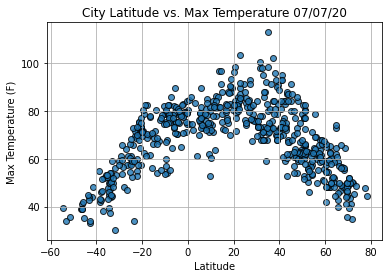

In [18]:
# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

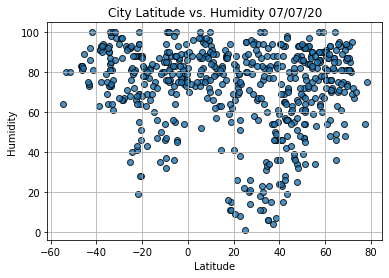

In [19]:
# Build the scatter plot for latitude vs. humidity.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig2.png")

# Show plot.
plt.show()

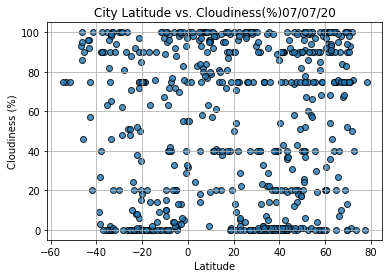

In [20]:
# Build the scatter plot for latitude vs. cloudiness.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness(%)" + time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude") 
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig3.png")

# Show plot.
plt.show()

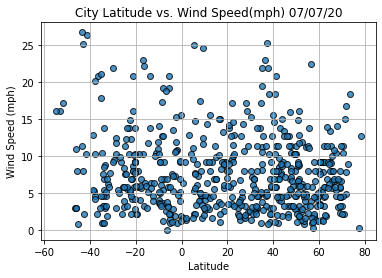

In [21]:
# Build the scatter plot for latitude vs. wind speed.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed(mph) "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig4.png")

# Show plot.
plt.show()

In [60]:
# Import linear regression from the SciPy stats module.
from scipy.stats import linregress

# Create a function to create perform linear regression on the weather data
# and plot a regression line and the equation with the data.  
def plot_linear_regression(x_values, y_values, title, y_label, text_coordinates):
    
    # Run regression on hemisphere weather data.
    (slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)
    
    # Calculate the regression line "y values" from the slope and intercept.
    regress_values = x_values * slope + intercept
    # Get the equation of the line.
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    # Create a scatter plot and plot the regression line.
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r")
    # Annotate the text for the line equation.
    plt.annotate(line_eq, text_coordinates, fontsize=15, color="red")
    plt.xlabel('Latitude')
    plt.title(title)
    plt.ylabel(y_label)
    print(f"The r-value is: {r_value:.3f}")
    plt.show()

In [61]:
index13 = city_df.loc[13]
index13

City                        Alofi
Country                        NU
Date          2020-07-07 22:12:05
Lat                        -19.06
Lng                       -169.92
Max Temp                     78.8
Humidity                       74
Cloudiness                     75
Wind Speed                   8.05
Name: 13, dtype: object

In [62]:
city_df.loc[(city_df["Lat"] >= 0)]

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
1,Vanavara,RU,2020-07-07 22:13:47,60.34,102.28,54.84,90,32,3.62
2,Barrow,US,2020-07-07 22:13:48,71.29,-156.79,41.00,80,1,14.99
6,Severo-Kurilsk,RU,2020-07-07 22:13:48,50.68,156.12,52.83,85,26,14.83
10,Iqaluit,CA,2020-07-07 22:11:24,63.75,-68.51,51.80,81,40,6.93
12,Torbay,CA,2020-07-07 22:11:02,47.67,-52.73,54.00,66,20,11.41
...,...,...,...,...,...,...,...,...,...
576,Nishihara,JP,2020-07-07 22:16:07,26.18,127.76,84.20,89,75,12.75
577,San Marcos,US,2020-07-07 22:16:07,33.14,-117.17,88.00,64,1,8.05
578,Douglas,US,2020-07-07 22:15:42,41.30,-96.17,93.20,46,1,8.05
580,Buchanan,LR,2020-07-07 22:16:08,5.88,-10.05,77.16,81,97,7.63


In [63]:
# Create Northern and Southern Hemisphere DataFrames.
northern_hemi_df = city_df.loc[(city_df["Lat"] >= 0)]
southern_hemi_df = city_df.loc[(city_df["Lat"] < 0)]

The r-value is: -0.688


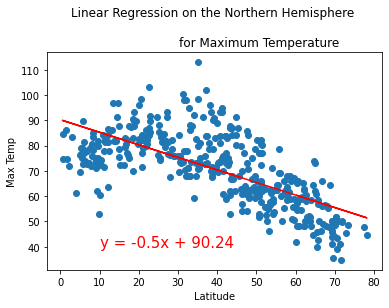

In [64]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       '''Linear Regression on the Northern Hemisphere \n
                       for Maximum Temperature''', 'Max Temp',(10,40))

The r-value is: 0.844


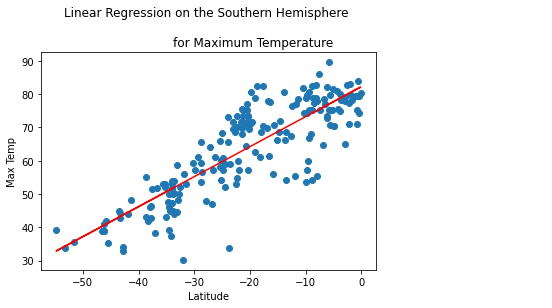

In [65]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       '''Linear Regression on the Southern Hemisphere \n
                       for Maximum Temperature''', 'Max Temp',(10,40))

The r-value is: 0.043


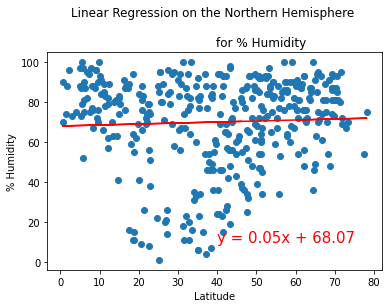

In [66]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       '''Linear Regression on the Northern Hemisphere \n
                        for % Humidity''', '% Humidity',(40,10))

The r-value is: -0.149


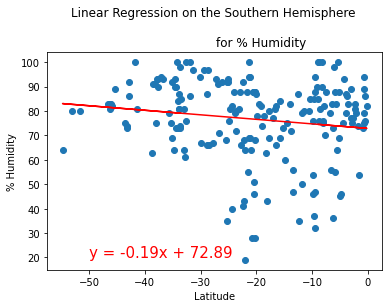

In [84]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       '''Linear Regression on the Southern Hemisphere \n
                        for % Humidity''', '% Humidity',(-50,20))

The r-value is: -0.034


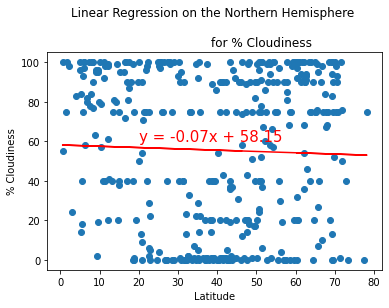

In [86]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       '''Linear Regression on the Northern Hemisphere \n
                        for % Cloudiness''', '% Cloudiness',(20,60))

The r-value is: -0.126


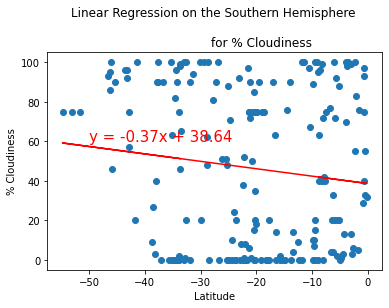

In [87]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       '''Linear Regression on the Southern Hemisphere \n
                        for % Cloudiness''', '% Cloudiness',(-50,60))

The r-value is: -0.045


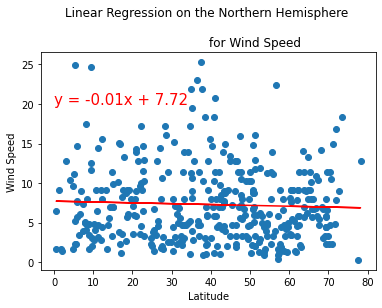

In [90]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       '''Linear Regression on the Northern Hemisphere \n
                        for Wind Speed''', 'Wind Speed',(0,20))

The r-value is: -0.133


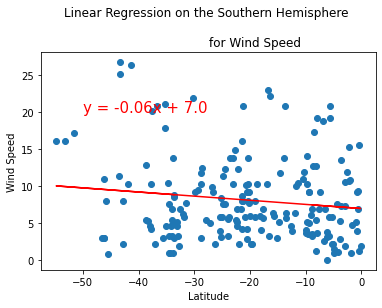

In [93]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       '''Linear Regression on the Southern Hemisphere \n
                        for Wind Speed''', 'Wind Speed',(-50,20))